In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sobol as sobol_sequence
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'

In [2]:
nsamples = 200
nmax = 1000

In [3]:
qseq = sobol_sequence.sample(nmax, 2)

In [4]:
qseq[500,:10]

array([0.43945312, 0.06445312])

In [5]:
pseq = np.random.rand(nsamples, 2)
pseq[:2], pseq.shape

(array([[0.46144088, 0.40848521],
        [0.43151572, 0.53960549]]), (200, 2))

In [6]:
def idx(nsamples, seed=14, low=100, nmax=nmax):
    np.random.seed(seed)
    idx = np.random.randint(low=low, high=nmax, size=2*nsamples)
    return np.unique(idx)[:nsamples]
idx(nsamples)[:10], len(np.unique(idx(nsamples)))

(array([102, 107, 108, 112, 115, 118, 119, 122, 125, 126]), 200)

In [7]:
pqseq = qseq[idx(nsamples)]
pqseq[:10], pqseq.shape

(array([[0.6640625, 0.0078125],
        [0.4765625, 0.6953125],
        [0.3515625, 0.0703125],
        [0.0703125, 0.3515625],
        [0.3203125, 0.6015625],
        [0.6953125, 0.4765625],
        [0.1953125, 0.9765625],
        [0.8828125, 0.2890625],
        [0.7578125, 0.9140625],
        [0.5078125, 0.1640625]]), (200, 2))

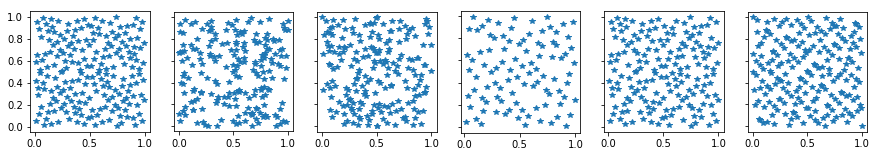

In [8]:
np.random.seed(105)
ri = lambda nmax: np.random.randint(low=200, high=nmax)

fig, axs = plt.subplots(ncols=6, sharey=True, 
                        subplot_kw={'aspect': 1}, 
                        figsize=2*(15,))
axs[0].plot(*qseq[-nsamples:].T, '*')
axs[1].plot(*pseq.T, '*')
axs[2].plot(*pqseq.T, '*')
r = ri(nmax)
axs[3].plot(*qseq[r:r+nsamples].T, '*')
r = ri(nmax)
axs[4].plot(*qseq[r:r+nsamples].T, '*')
axs[5].plot(*sobol_sequence.rand(nsamples, 2).T, '*')

plt.show()

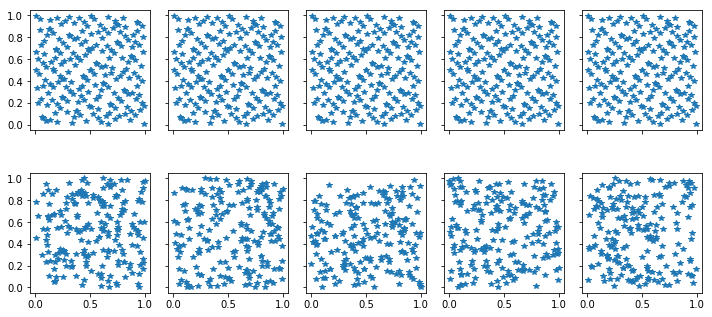

In [9]:
nfig = 5
fig, axs = plt.subplots(ncols=nfig, nrows=2, 
                        sharex=True, sharey=True,
                        subplot_kw={'aspect': 1}, 
                        figsize=(10, 5))
for ii in range(0, nfig):
    axs[0, ii].plot(*sobol_sequence.rand(nsamples, 2).T, '*')
    axs[1, ii].plot(*np.random.rand(nsamples, 2).T, '*')

plt.tight_layout()
plt.show()